## Caret para el caso de regresión
### Caso CO2



**Descripción del Conjunto de Datos:**

Utilizaremos un conjunto de datos que encapsula las emisiones de dióxido de carbono (CO2) generadas a partir de la quema de carbón para producir energía eléctrica en los Estados Unidos de América entre los años 1973 y 2016. Con este conjunto de datos, emplearemos el algoritmo XGBoost para intentar predecir las emisiones de dióxido de carbono en un cuaderno de Jupyter (Jupyter Notebook) para los próximos años.

**Detalles Específicos:**

1. **Período de Tiempo:**
   - **Desde:** 1973
   - **Hasta:** 2016

2. **Fuente de Emisiones:**
   - **Quema de Carbón:** El dataset se centra exclusivamente en las emisiones de CO2 provenientes de la quema de carbón para la generación de energía eléctrica.

3. **Ubicación Geográfica:**
   - **Estados Unidos de América:** El dataset recoge datos de emisiones a nivel nacional en los EE.UU.

4. **Objetivo del Análisis:**
   - **Predicción de Emisiones:** Utilizando el algoritmo de aprendizaje automático XGBoost, se buscará predecir las emisiones de CO2 para los años siguientes al período del conjunto de datos.

**Metodología:**

1. **Carga y Exploración de Datos:**
   - Se cargarán los datos en un cuaderno de Jupyter y se realizará una exploración inicial para comprender la estructura y las características del conjunto de datos.

2. **Preprocesamiento de Datos:**
   - Limpieza y transformación de los datos, incluyendo el manejo de valores faltantes y la normalización de variables, si es necesario.

3. **Entrenamiento del Modelo:**
   - Se dividirán los datos en conjuntos de entrenamiento y prueba.
   - Se utilizará el algoritmo XGBoost para entrenar el modelo con los datos de entrenamiento.

4. **Evaluación y Predicción:**
   - Se evaluará el rendimiento del modelo utilizando métricas apropiadas.
   - Se utilizará el modelo entrenado para predecir las emisiones de CO2 para los próximos años.

**Importancia del Análisis:**

Este análisis es crucial para comprender las tendencias históricas de las emisiones de CO2 debido a la quema de carbón y para prever futuros niveles de emisiones. Estas predicciones pueden informar políticas y estrategias para mitigar el cambio climático y reducir la huella de carbono en la generación de energía.



In [2]:
#!pip3 install --upgrade scikit-learn

In [3]:
## 1. Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## EDA

In [4]:
data = pd.read_csv('co2.csv')
data['Month'] = data.YYYYMM.astype(str).str[4:6].astype(float)
data['Year'] = data.YYYYMM.astype(str).str[0:4].astype(float)
data.head(5)

,YYYYMM,Value,Month,Year
0,197301,72.076,1.0,1973.0
1,197302,64.442,2.0,1973.0
2,197303,64.084,3.0,1973.0
3,197304,60.842,4.0,1973.0
4,197305,61.798,5.0,1973.0


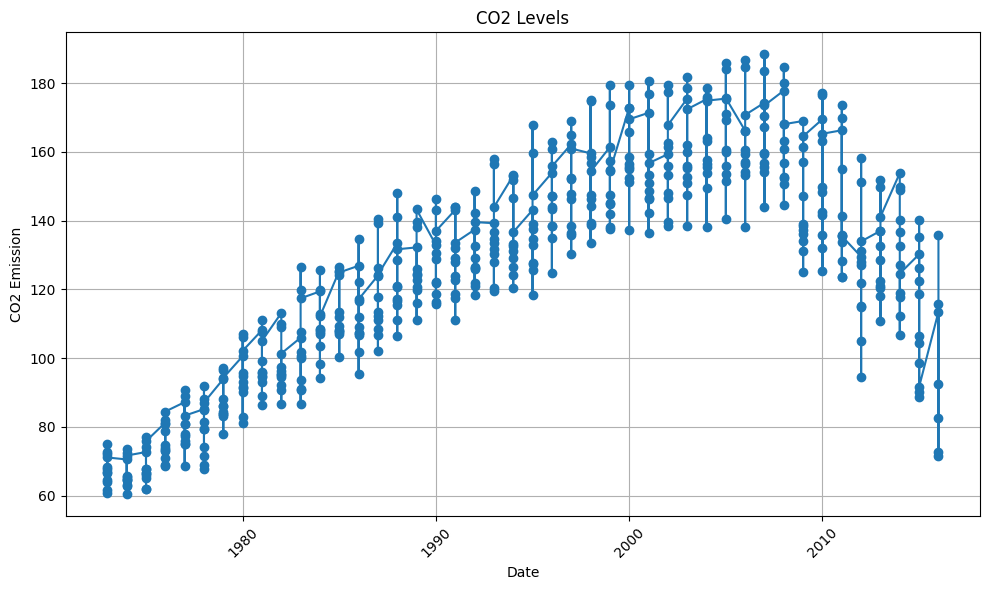

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Value'], marker='o')
plt.title('CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 Emission')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

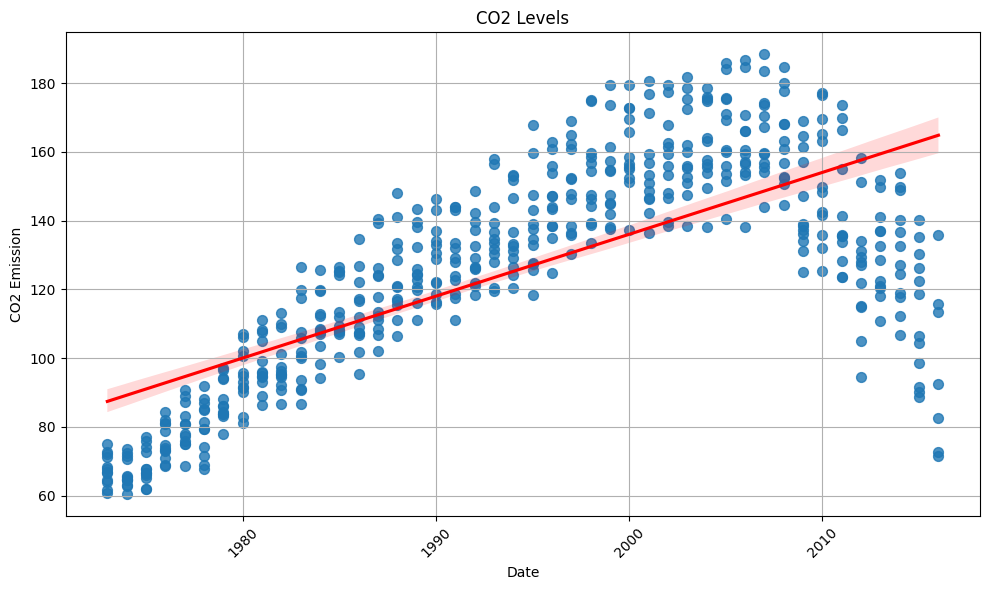

In [6]:
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.regplot(x='Year', y='Value', data=data, marker='o', scatter_kws={'s':50}, line_kws={'color':'red'})
plt.title('CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 Emission')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

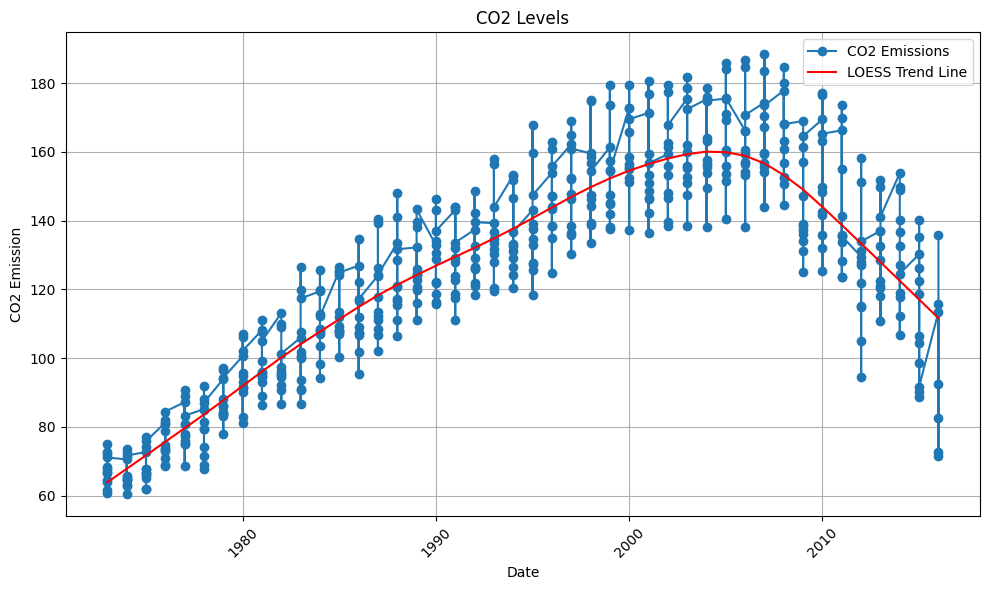

In [7]:
import statsmodels.api as sm


x = data['Year']
y = data['Value']

# Aplicar LOESS
lowess = sm.nonparametric.lowess(y, x, frac=0.3)  # frac controla el nivel de suavizado


plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', label='CO2 Emissions')
plt.plot(lowess[:, 0], lowess[:, 1], 'r-', label='LOESS Trend Line')
plt.title('CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 Emission')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()


plt.show()

## Diseñando un modelo de Machine Learning

In [8]:
X = data.loc[:,['Month', 'Year']].values
y = data.loc[:,'Value'].values

In [9]:
data_dmatrix = xgb.DMatrix(X,label=y)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [11]:
reg_mod = xgb.XGBRegressor()
reg_mod.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Mean Squared Error (MSE): 47.39254427836067
Root Mean Squared Error (RMSE): 6.884224304768161
Mean Absolute Error (MAE): 4.101451493961797
R^2 Score: 0.9570363525929916


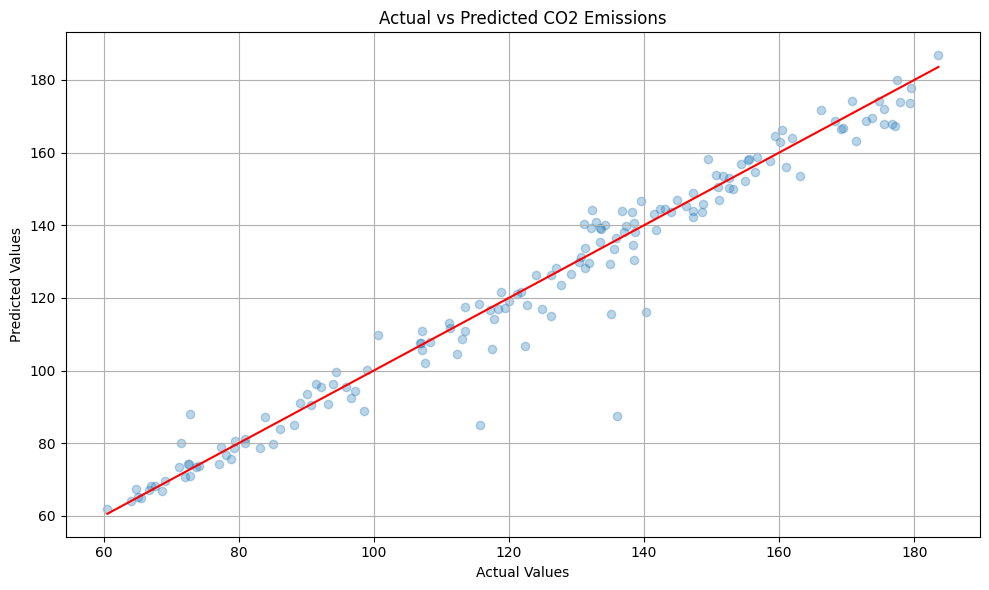

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predecir en el conjunto de prueba
y_pred = reg_mod.predict(X_test)

# Calcular las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de rendimiento
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")

# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea ideal
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted CO2 Emissions')
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

## Mejorando el modelo

In [13]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Preparar los datos
X = data.drop(columns=['Value']).values
y = data['Value'].values

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir los parámetros para Grid Search
param_grid = {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate': [0.01, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.75, 0.9],
    'colsample_bytree': [0.8, 1],
    'max_depth': [3, 5, 7, 9],
    'gamma': [0, 0.1, 0.2]
}

# Inicializar el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Configurar K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Inicializar Grid Search con K-Fold Cross-Validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)

# Ejecutar Grid Search
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Best parameters found: ", grid_search.best_params_)

# Entrenar el modelo con los mejores parámetros
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train, y_train)

# Evaluar el modelo
y_pred = best_xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")






/Users/danieljimenez/opt/anaconda3/envs/caret/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters found:  {'colsample_bytree': 0.8, 'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Mean Squared Error (MSE): 21.67840591950185
Root Mean Squared Error (RMSE): 4.656007508531515
Mean Absolute Error (MAE): 3.4637282197794343
R^2 Score: 0.9803474702096391


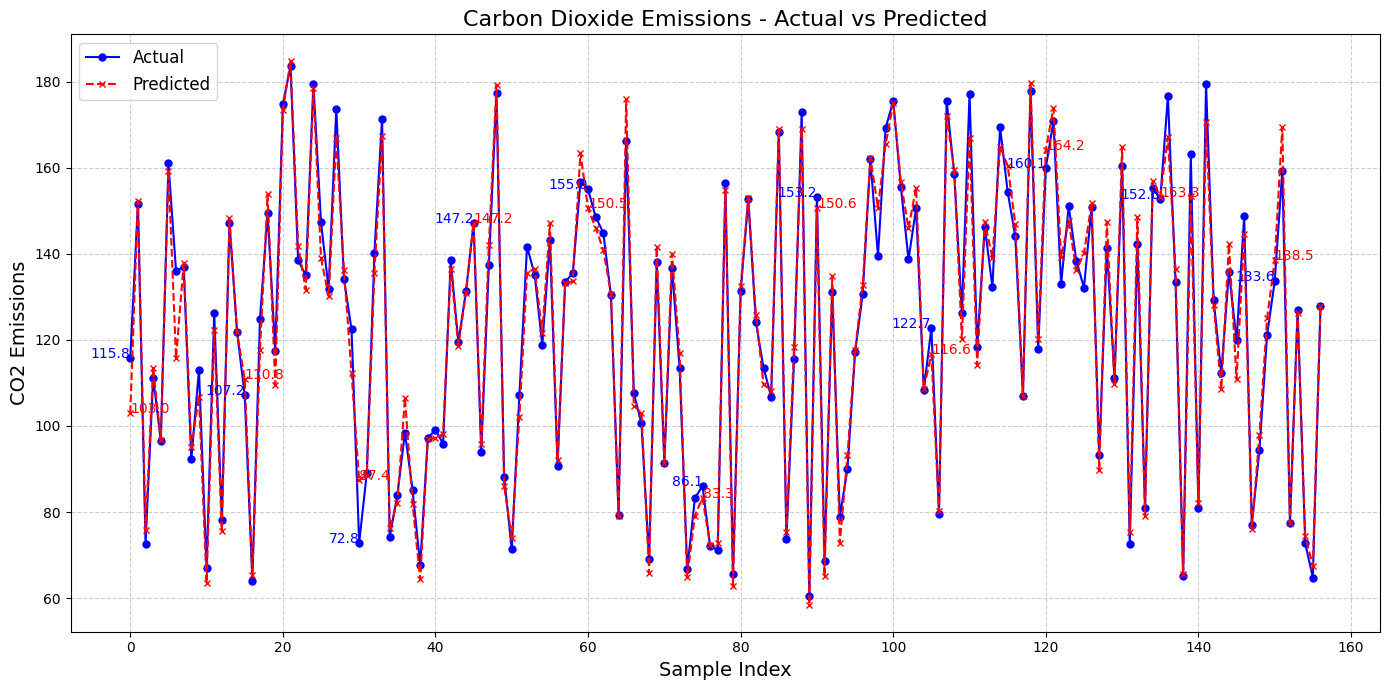

In [14]:
import matplotlib.pyplot as plt

predictions = best_xgb.predict(X_test)

plt.figure(figsize=(14, 7), dpi=100)
x_ax = range(len(y_test))

# Plot actual test values
plt.plot(x_ax, y_test, label="Actual", color="blue", linestyle='-', marker='o', markersize=5)

# Plot predicted values
plt.plot(x_ax, predictions, label="Predicted", color="red", linestyle='--', marker='x', markersize=5)

# Add title and labels
plt.title("Carbon Dioxide Emissions - Actual vs Predicted", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("CO2 Emissions", fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend
plt.legend(loc='upper left', fontsize=12)

# Optionally, add annotations to highlight key points
for i in range(0, len(x_ax), len(x_ax) // 10):
    plt.text(x_ax[i], y_test[i], f'{y_test[i]:.1f}', color='blue', fontsize=10, ha='right')
    plt.text(x_ax[i], predictions[i], f'{predictions[i]:.1f}', color='red', fontsize=10, ha='left')

# Show plot
plt.tight_layout()
plt.show()
